In [ ]:
# 1) Design model (input_size, output_size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 60, loss=1167.8042
epoch: 120, loss=458.0124
epoch: 180, loss=351.6629
epoch: 240, loss=335.4966
epoch: 300, loss=333.0187
epoch: 360, loss=332.6373
epoch: 420, loss=332.5784
epoch: 480, loss=332.5692
epoch: 540, loss=332.5678
epoch: 600, loss=332.5676


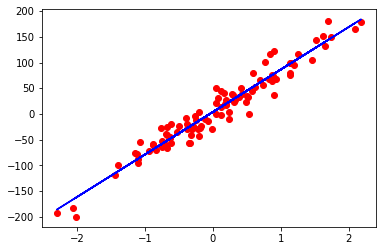

In [15]:
# 0) Prepare our data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 600
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss   = criterion(y_pred, y)
    
    # backward_pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if(epoch+1) % 60 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')
        
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')